# Visualize Ribosome Paralog Normalized Counts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def get_paralog_diffs(df):
    df1 = df.copy()

    prlgs = ["RPL1A","RPL1B","RPL2A","RPL2B","RPL12A","RPL12B","RPL18A","RPL18B","RPL19A","RPL19B",
         "RPL20A","RPL20B","RPL23A","RPL23B","RPL35A","RPL35B","RPL40A","RPL40B","RPL41A","RPL41B",
         "RPL42A","RPL42B","RPL43A","RPL43B","RPS4A","RPS4B","RPS6A","RPS6B","RPS8A","RPS8B","RPS11A",
         "RPS11B","RPS16A","RPS16B","RPS18A","RPS18B","RPS23A","RPS23B","RPS24A","RPS24B","RPS30A",
         "RPS30B"]

    prlg_pairs = [(base_gene+"A", base_gene+"B") for base_gene in {prlg[:-1] for prlg in prlgs}]

    diff_df = pd.DataFrame(columns=["ParalogA", "ParalogB", "FC"])
    p1s, p2s, FCs, bases = [], [], [], []


    for paralog1, paralog2 in prlg_pairs:
        count_p1 = df1[df1["gene_id"] == paralog1]['avg'].values[0]
        count_p2 = df1[df1["gene_id"] == paralog2]['avg'].values[0]
        
        log2FC = np.log2(count_p2/count_p1)
        
        FCs.append(log2FC)
        p1s.append(paralog1) 
        p2s.append(paralog2)
        bases.append(paralog1[:-1])

    diff_df['ParalogA'] = p1s
    diff_df['ParalogB'] = p2s
    diff_df['FC'] = FCs
    diff_df['Base'] = bases
        
    return diff_df


## GeTMM

### Blevins et al. 2019: GeTMM

In [35]:
df = pd.read_csv('Blevins_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,368.216416,508.818643
1,RPL1B,285.342732,553.419481
2,RPL2A,736.567764,1787.038132
3,RPL2B,846.941860,2976.032178
4,RPL12A,1018.913905,2662.031254


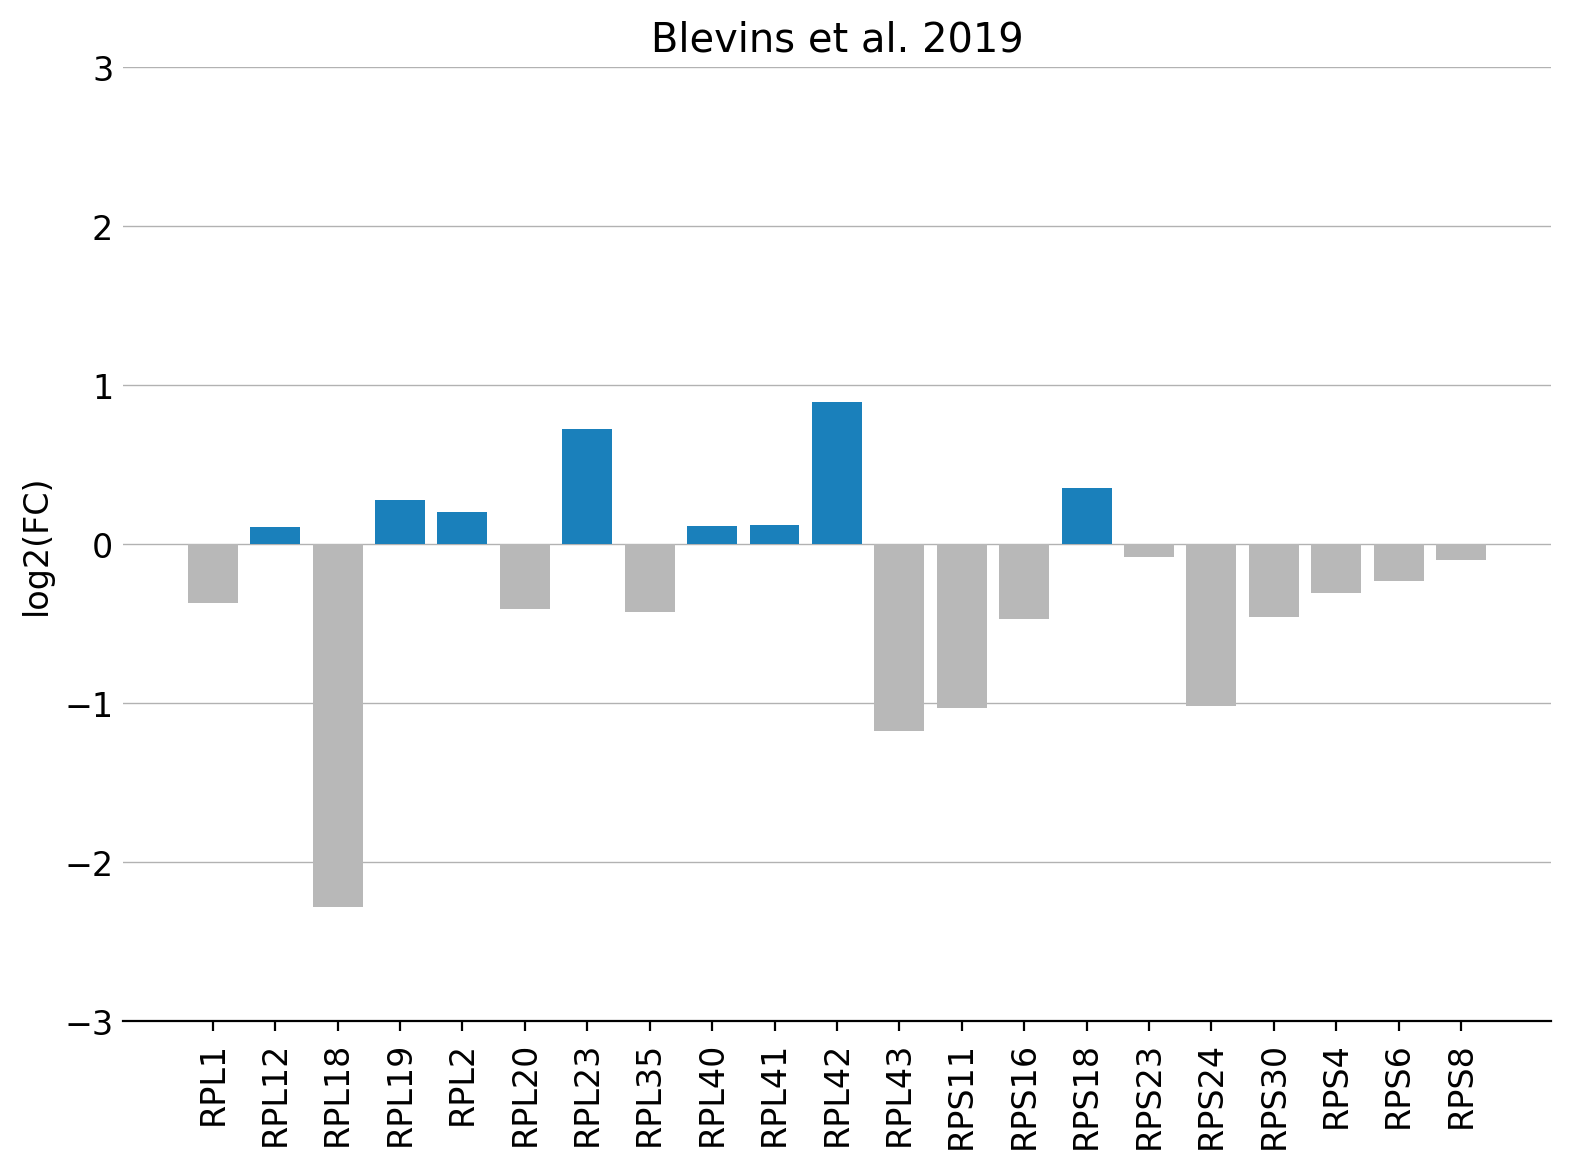

In [36]:
df = pd.read_csv('Blevins_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3, 3)

plt.title('Blevins et al. 2019')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()

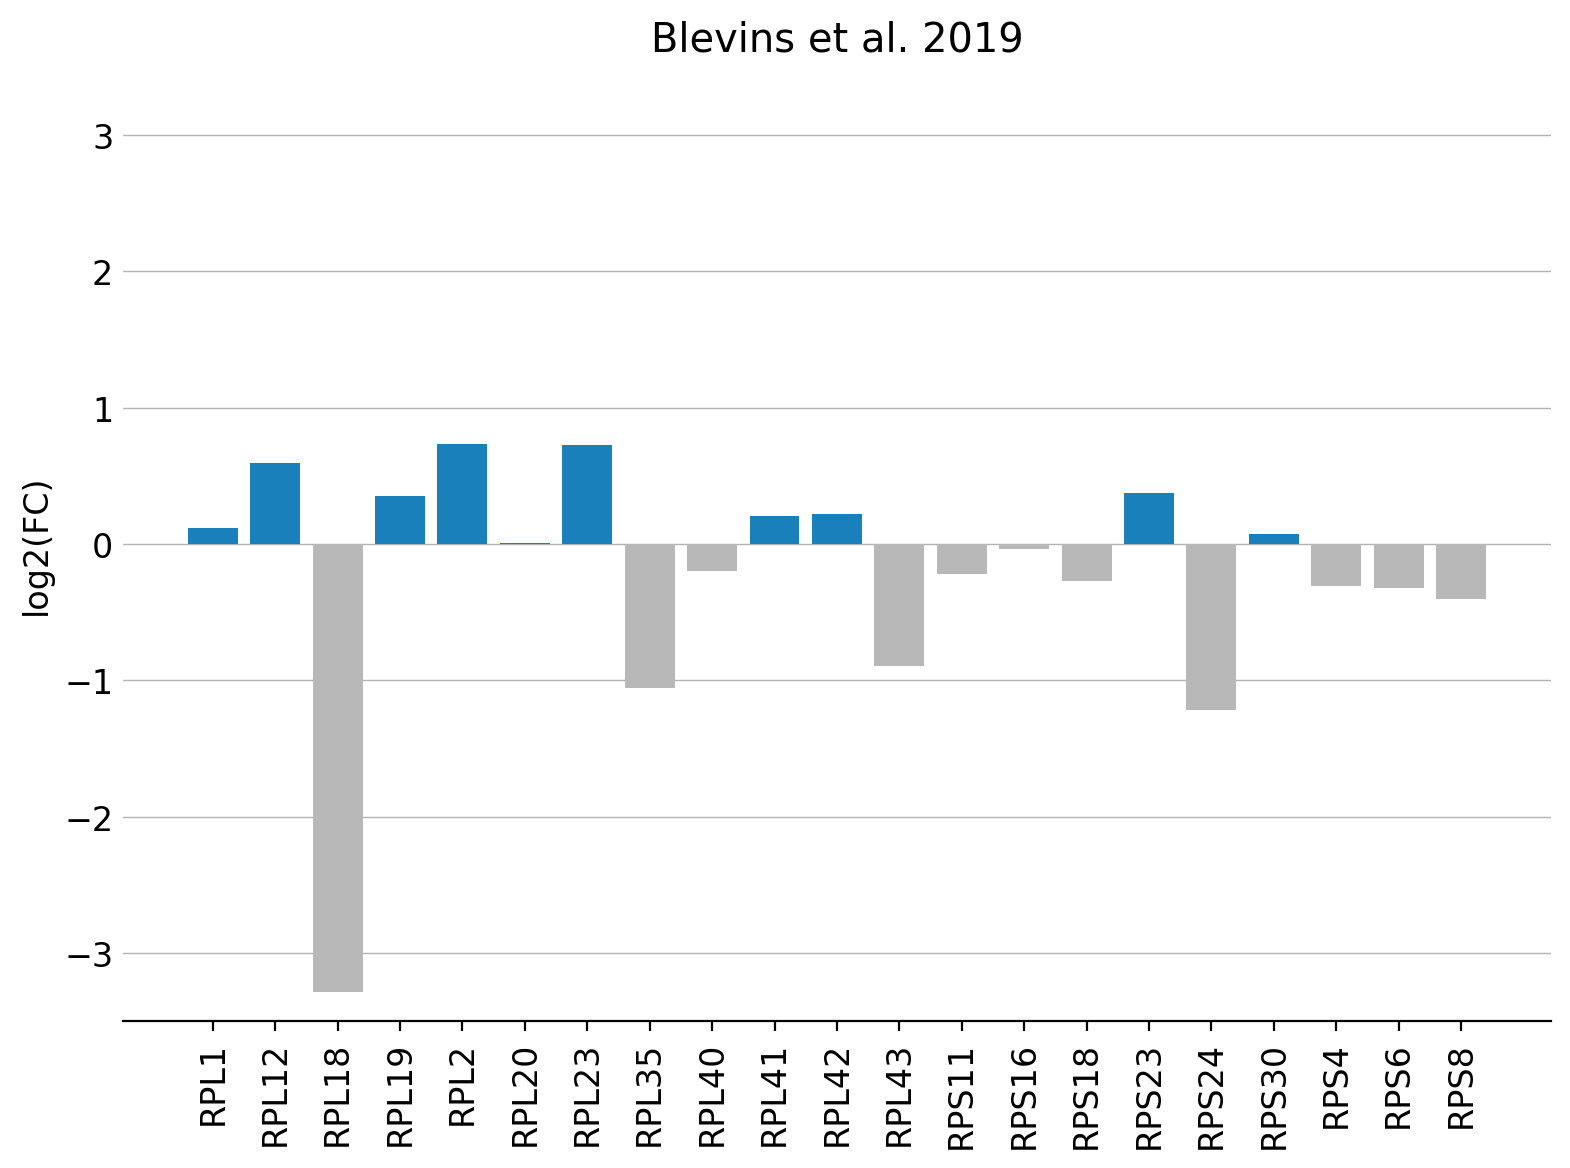

In [37]:
df = pd.read_csv('Blevins_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Blevins et al. 2019')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


In [38]:
fc_rna_blevins = rna_diffs[['Base', 'FC']].reset_index(drop=True)
fc_rna_blevins.columns = ['Base', "Blevins_FC"]
fc_ribo_blevins = ribo_diffs[['Base', 'FC']].reset_index(drop=True)
fc_ribo_blevins.columns = ['Base', "Blevins_FC"]

### Blevins et al. 2019 Replication: GeTMM

In [134]:
df = pd.read_csv('Replication_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,216.223216,454.722993
1,RPL1B,217.361047,508.535405
2,RPL2A,1096.369328,1848.461402
3,RPL2B,1208.755713,3170.283696
4,RPL12A,937.752875,2560.758986


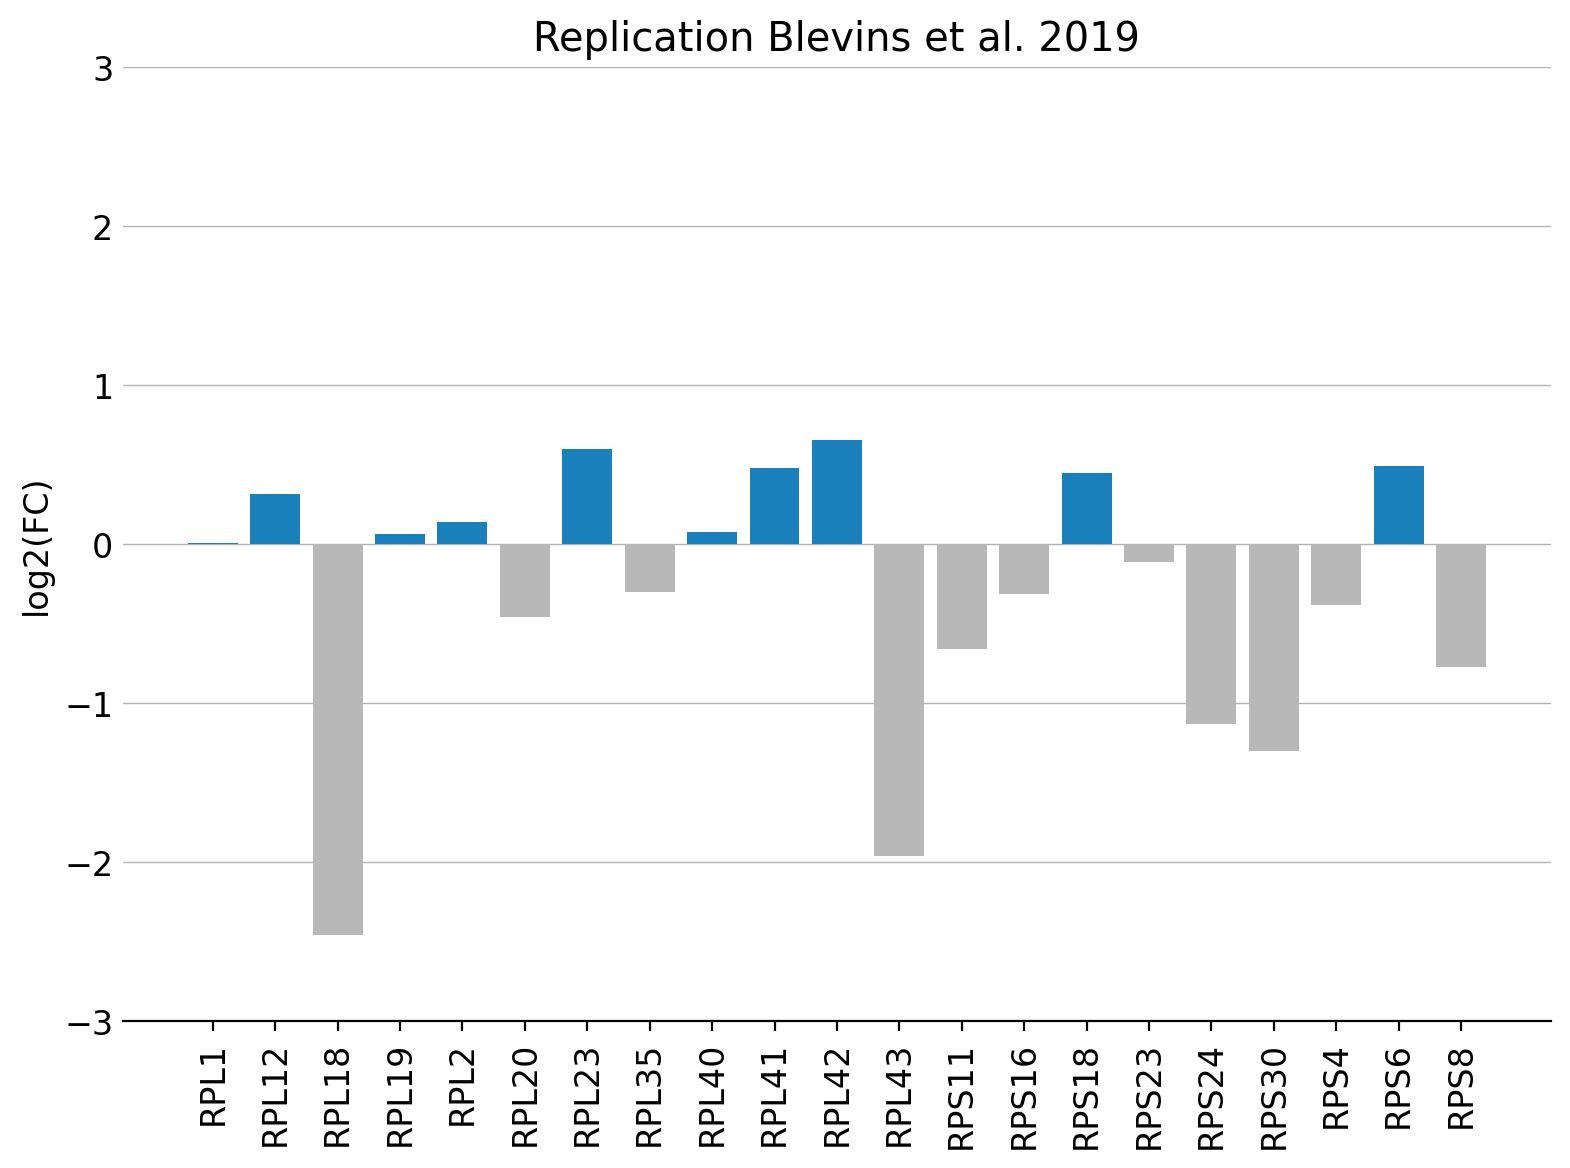

In [135]:
df = pd.read_csv('Replication_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3, 3)

plt.title('Replication Blevins et al. 2019')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()

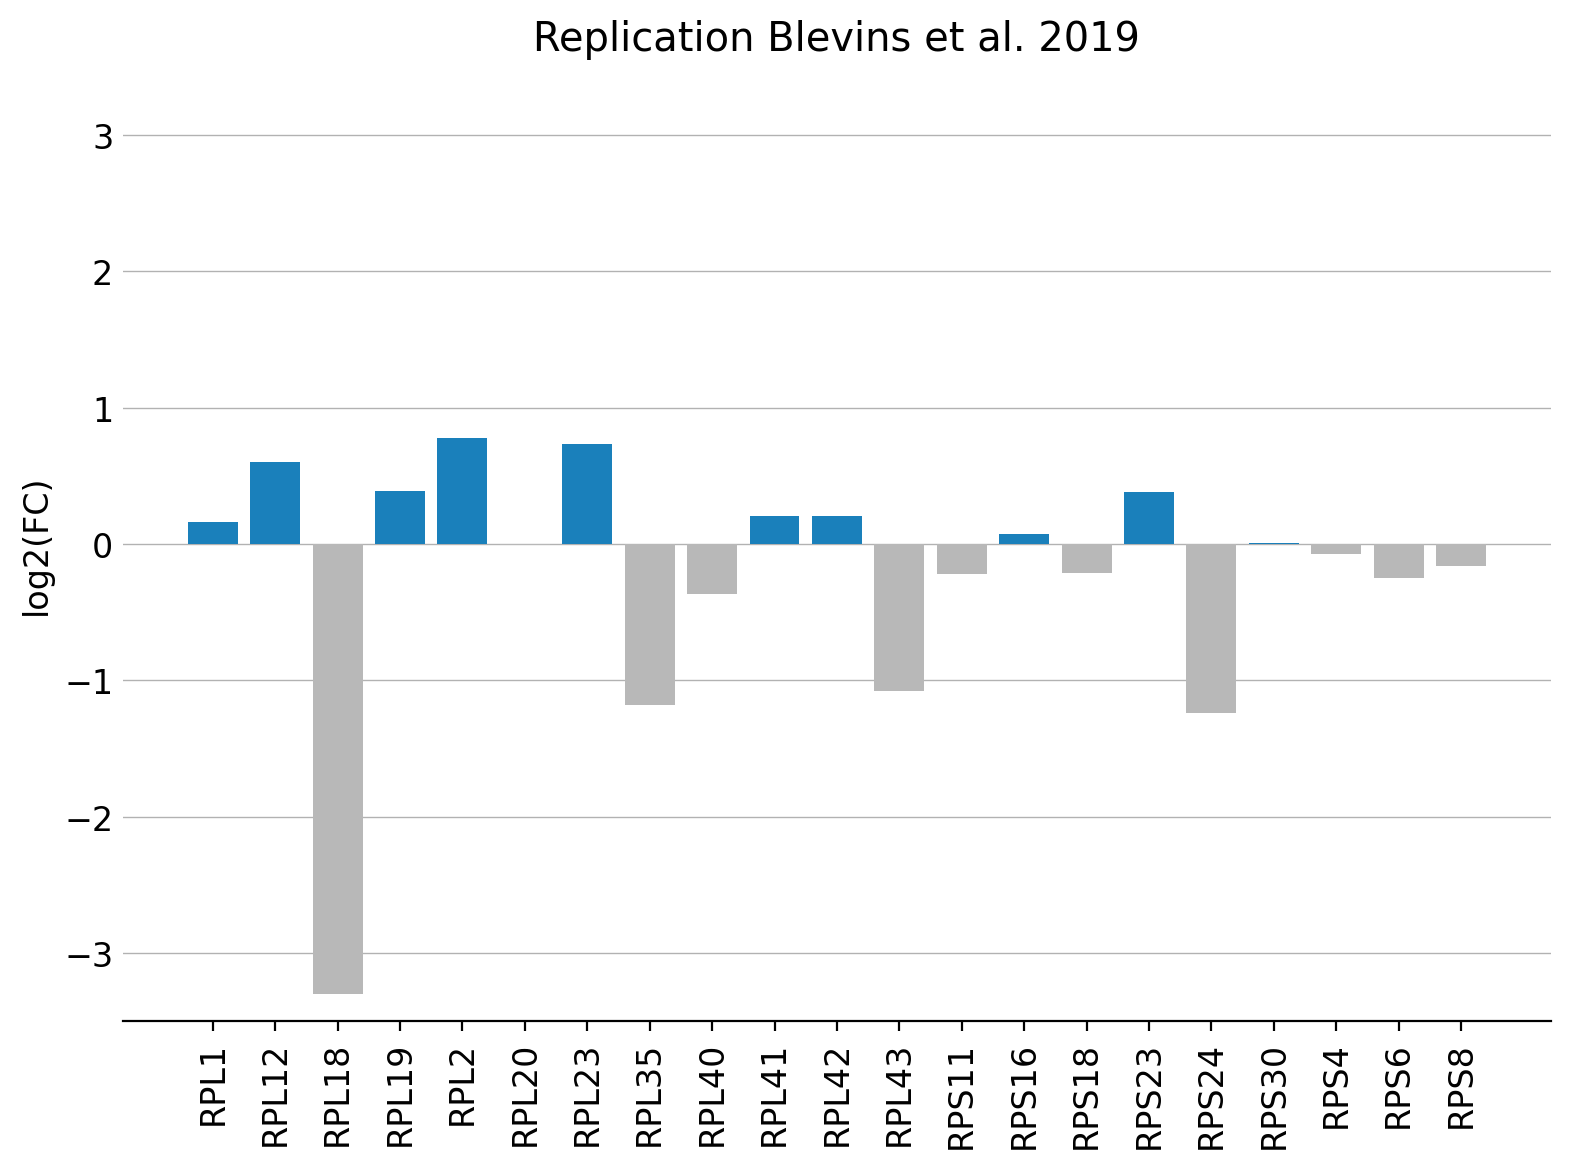

In [136]:
df = pd.read_csv('Replication_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Replication Blevins et al. 2019')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


### Nedialkova et al. GeTMM

In [39]:
df = pd.read_csv('Nedialkova_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,194.184947,95.927093
1,RPL1B,339.847882,135.287694
2,RPL2A,1050.023844,1438.429811
3,RPL2B,2243.962278,2548.998692
4,RPL12A,1625.638540,2553.591563


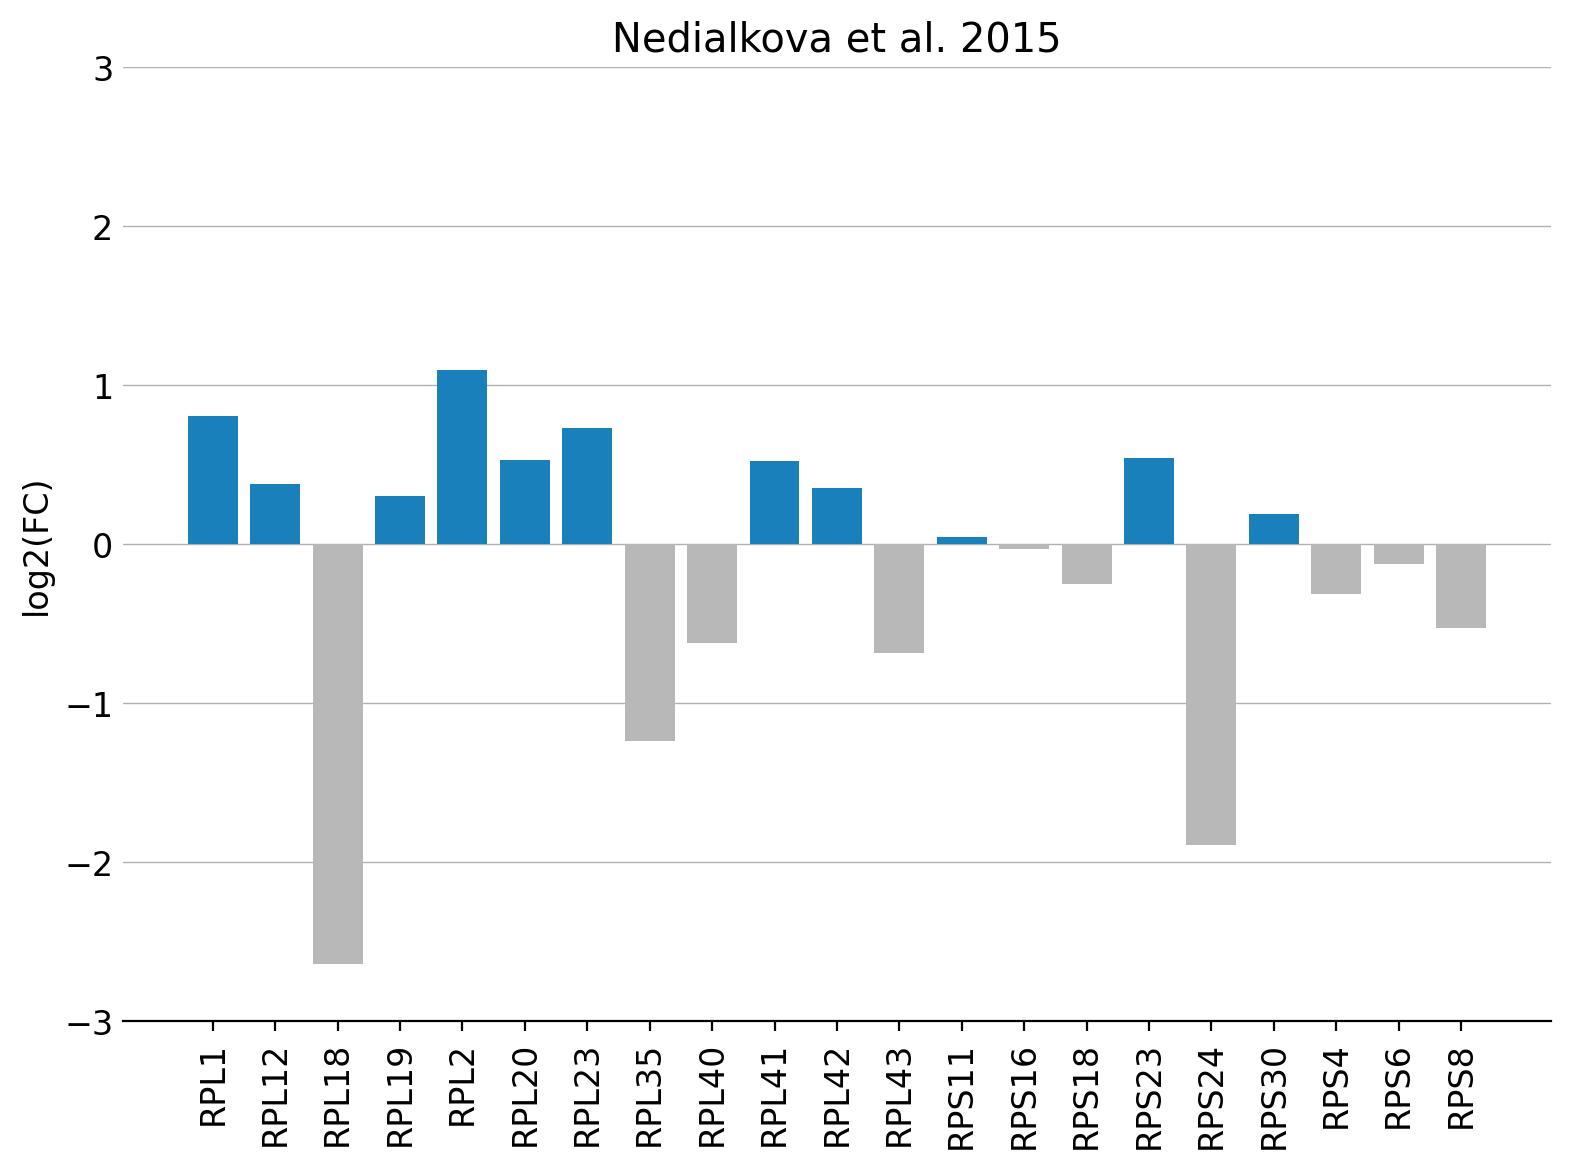

In [40]:
df = pd.read_csv('Nedialkova_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3, 3)

plt.title('Nedialkova et al. 2015')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


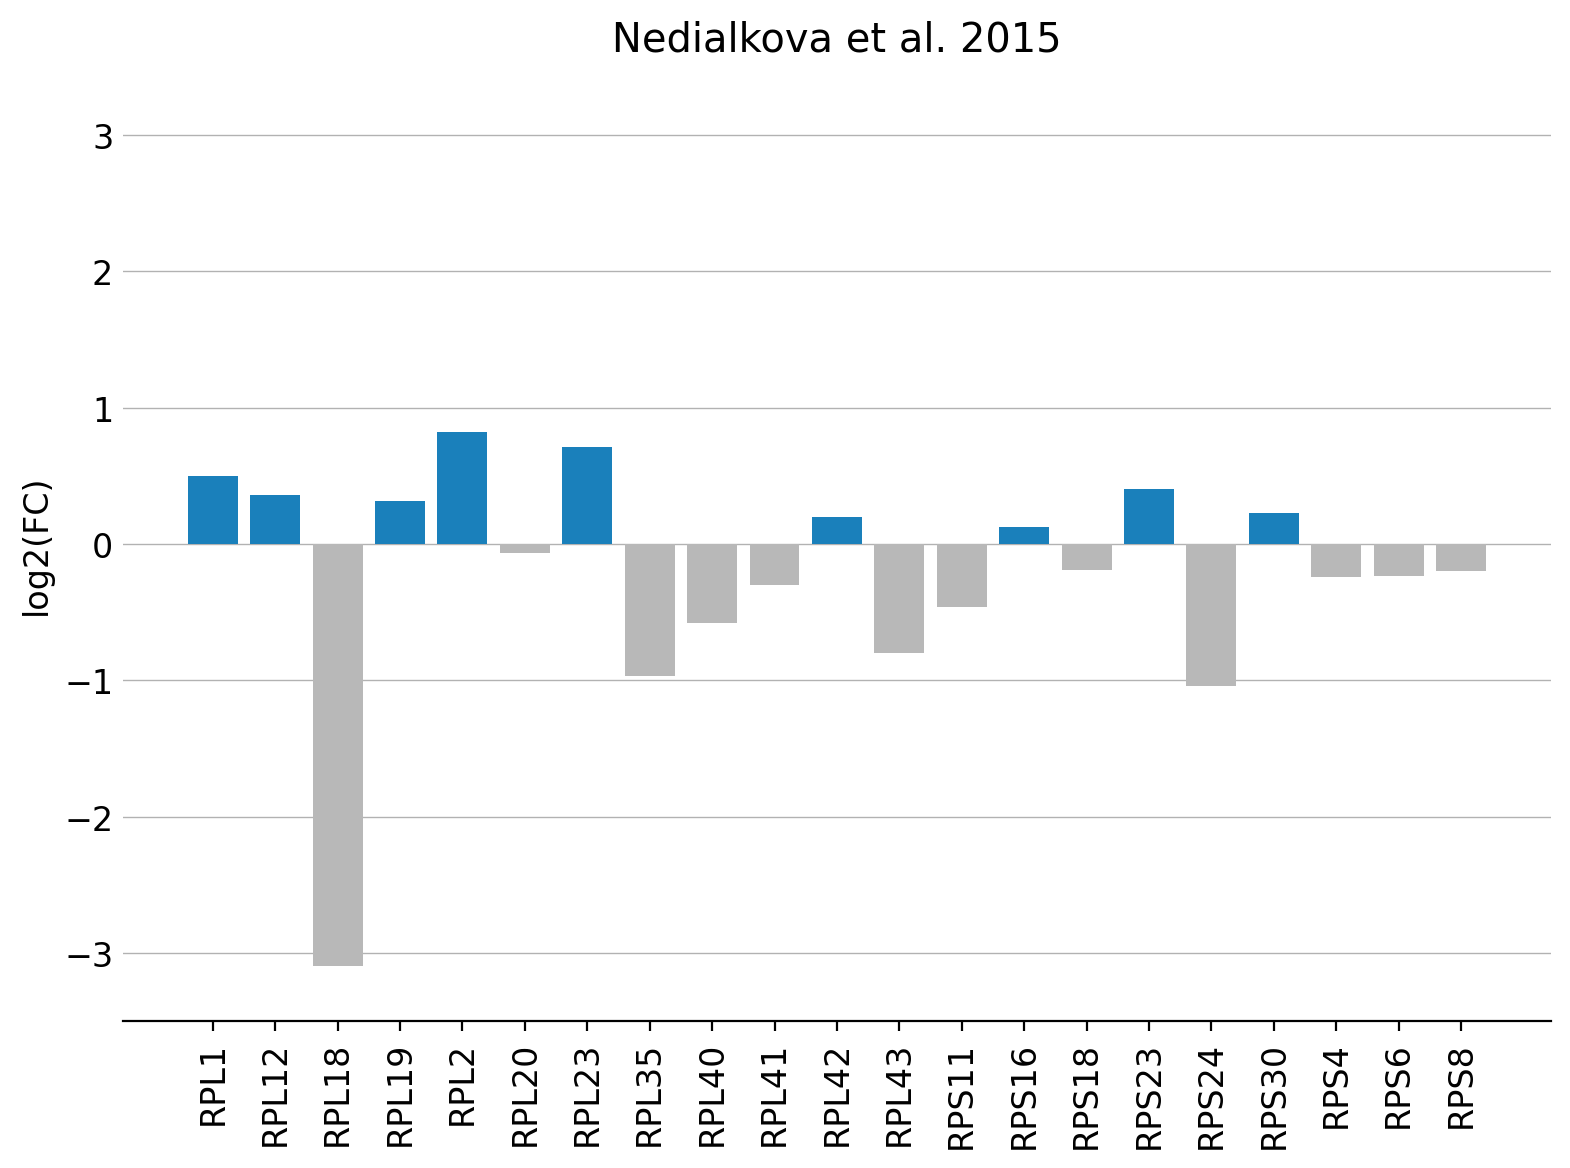

In [41]:
df = pd.read_csv('Nedialkova_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Nedialkova et al. 2015')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


In [42]:
fc_rna_nedialkova = rna_diffs[['Base', 'FC']].reset_index(drop=True)
fc_rna_nedialkova.columns = ['Base', "Nedialkova_FC"]
fc_ribo_nedialkova = ribo_diffs[['Base', 'FC']].reset_index(drop=True)
fc_ribo_nedialkova.columns = ['Base', "Nedialkova_FC"]

### Zinshteyn et al. 2013 GeTMM

In [43]:
df = pd.read_csv('Zinshteyn_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,159.294078,463.557175
1,RPL1B,289.988413,569.601604
2,RPL2A,844.624019,2059.343080
3,RPL2B,1354.305802,3420.361767
4,RPL12A,914.225613,2860.544025


/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_16687/792097551.py:20: RuntimeWarning: invalid value encountered in scalar divide
  log2FC = np.log2(count_p2/count_p1)


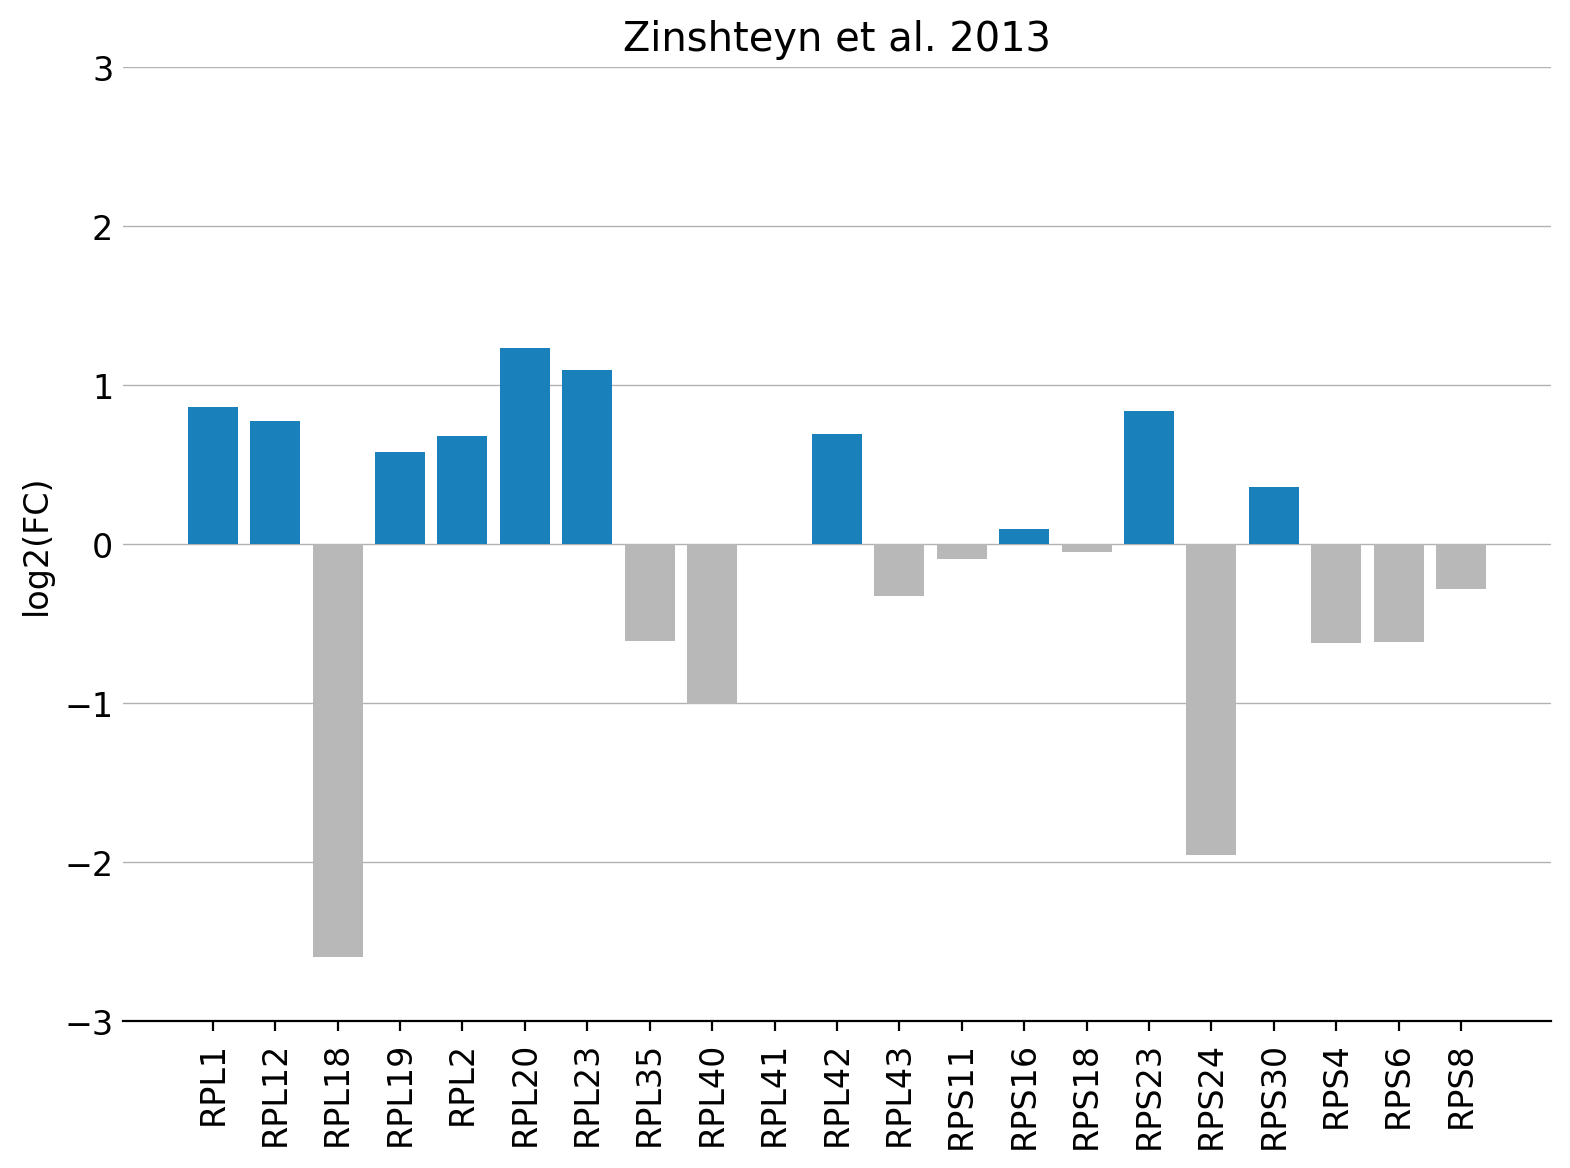

In [44]:
df = pd.read_csv('Zinshteyn_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3, 3)

plt.title('Zinshteyn et al. 2013')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_16687/792097551.py:20: RuntimeWarning: invalid value encountered in scalar divide
  log2FC = np.log2(count_p2/count_p1)


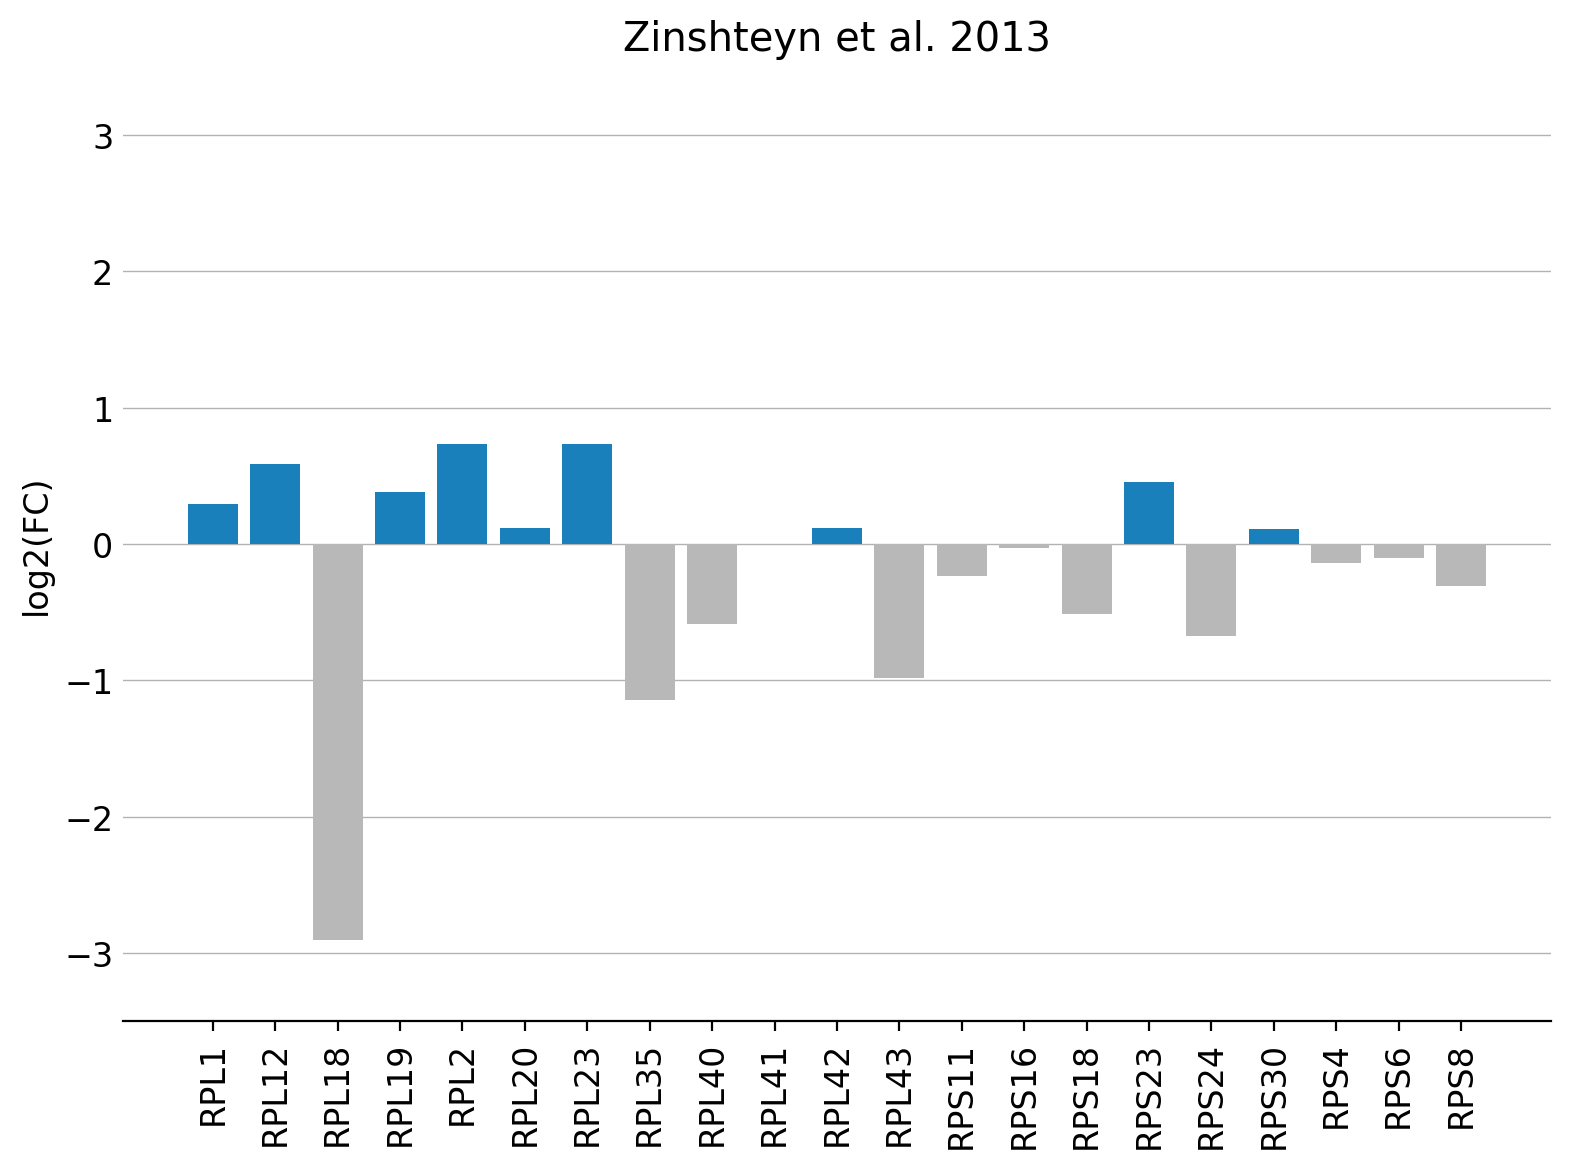

In [45]:
df = pd.read_csv('Zinshteyn_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Zinshteyn et al. 2013')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


In [46]:
fc_rna_zinshteyn = rna_diffs[['Base', 'FC']].reset_index(drop=True)
fc_rna_zinshteyn.columns = ['Base', "Zinshteyn_FC"]
fc_ribo_zinshteyn = ribo_diffs[['Base', 'FC']].reset_index(drop=True)
fc_ribo_zinshteyn.columns = ['Base', "Zinshteyn_FC"]

### Heyer et al. 2016 GeTMM

In [58]:
df = pd.read_csv('Heyer_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,872.627421,606.643550
1,RPL1B,890.371366,580.591271
2,RPL2A,1689.043175,1115.067335
3,RPL2B,4891.820406,1567.856598
4,RPL12A,980.620101,2721.404730


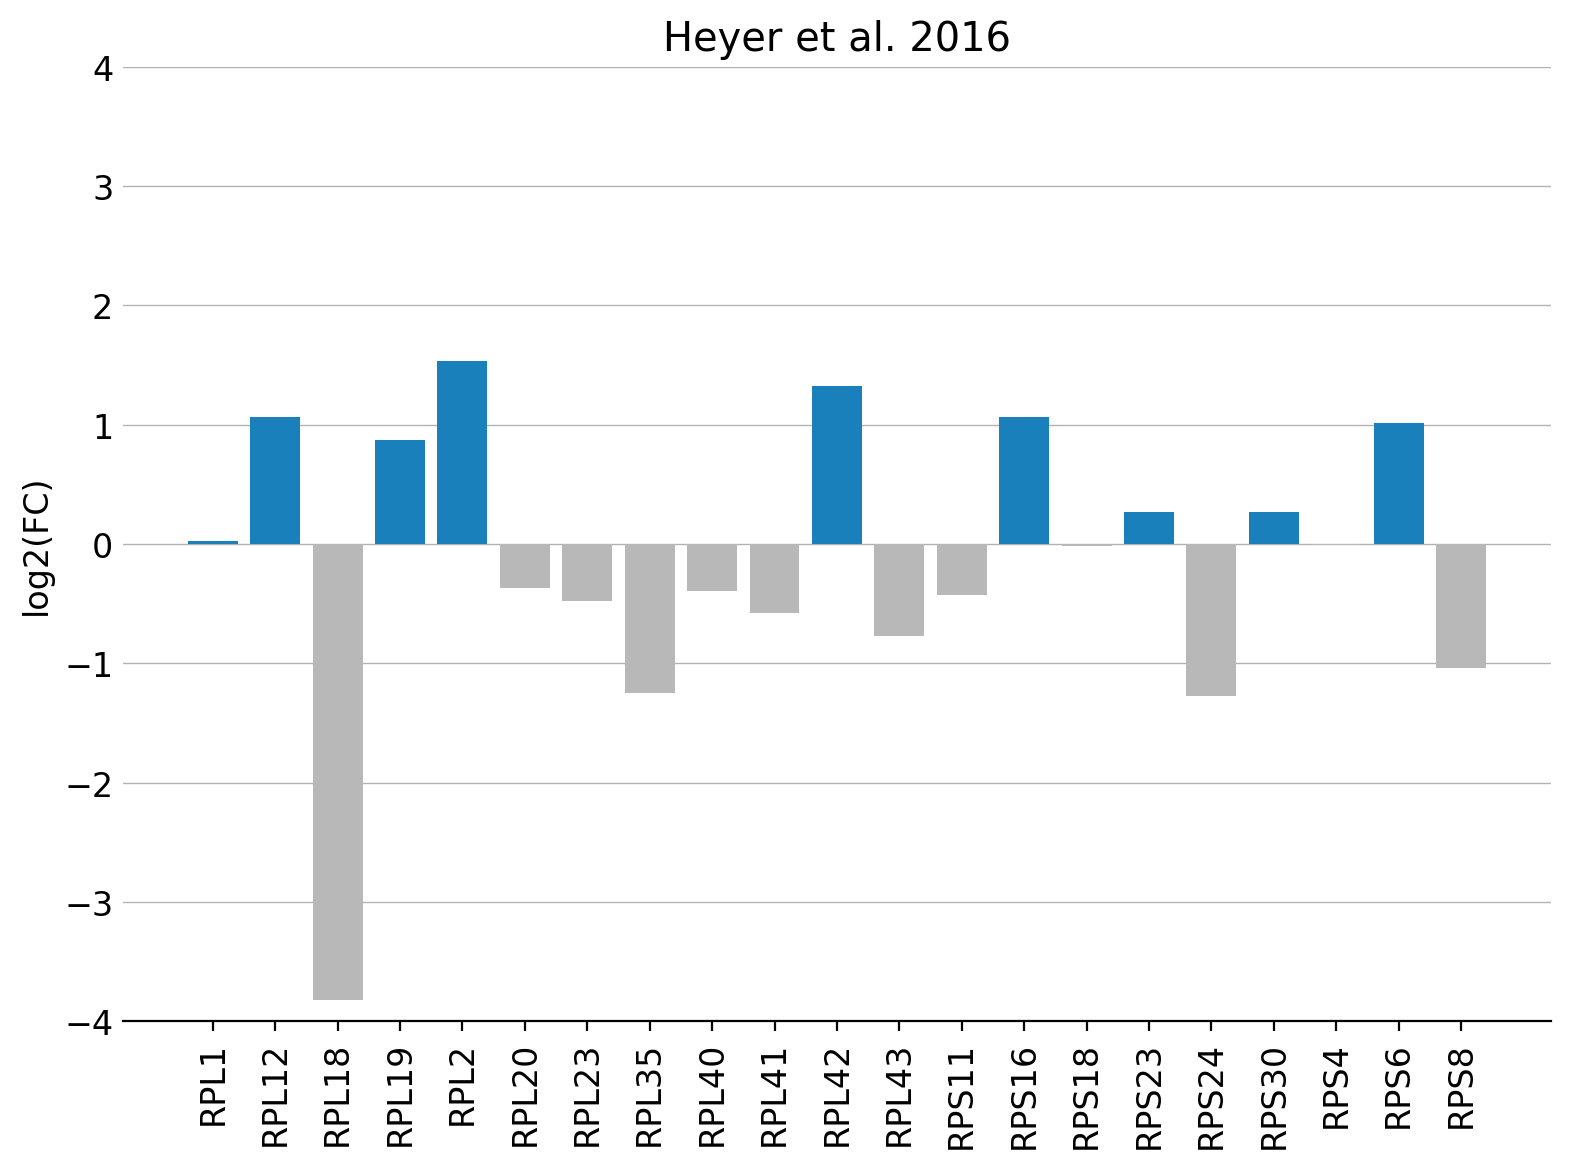

In [59]:
df = pd.read_csv('Heyer_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-4, 4)

plt.title('Heyer et al. 2016')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


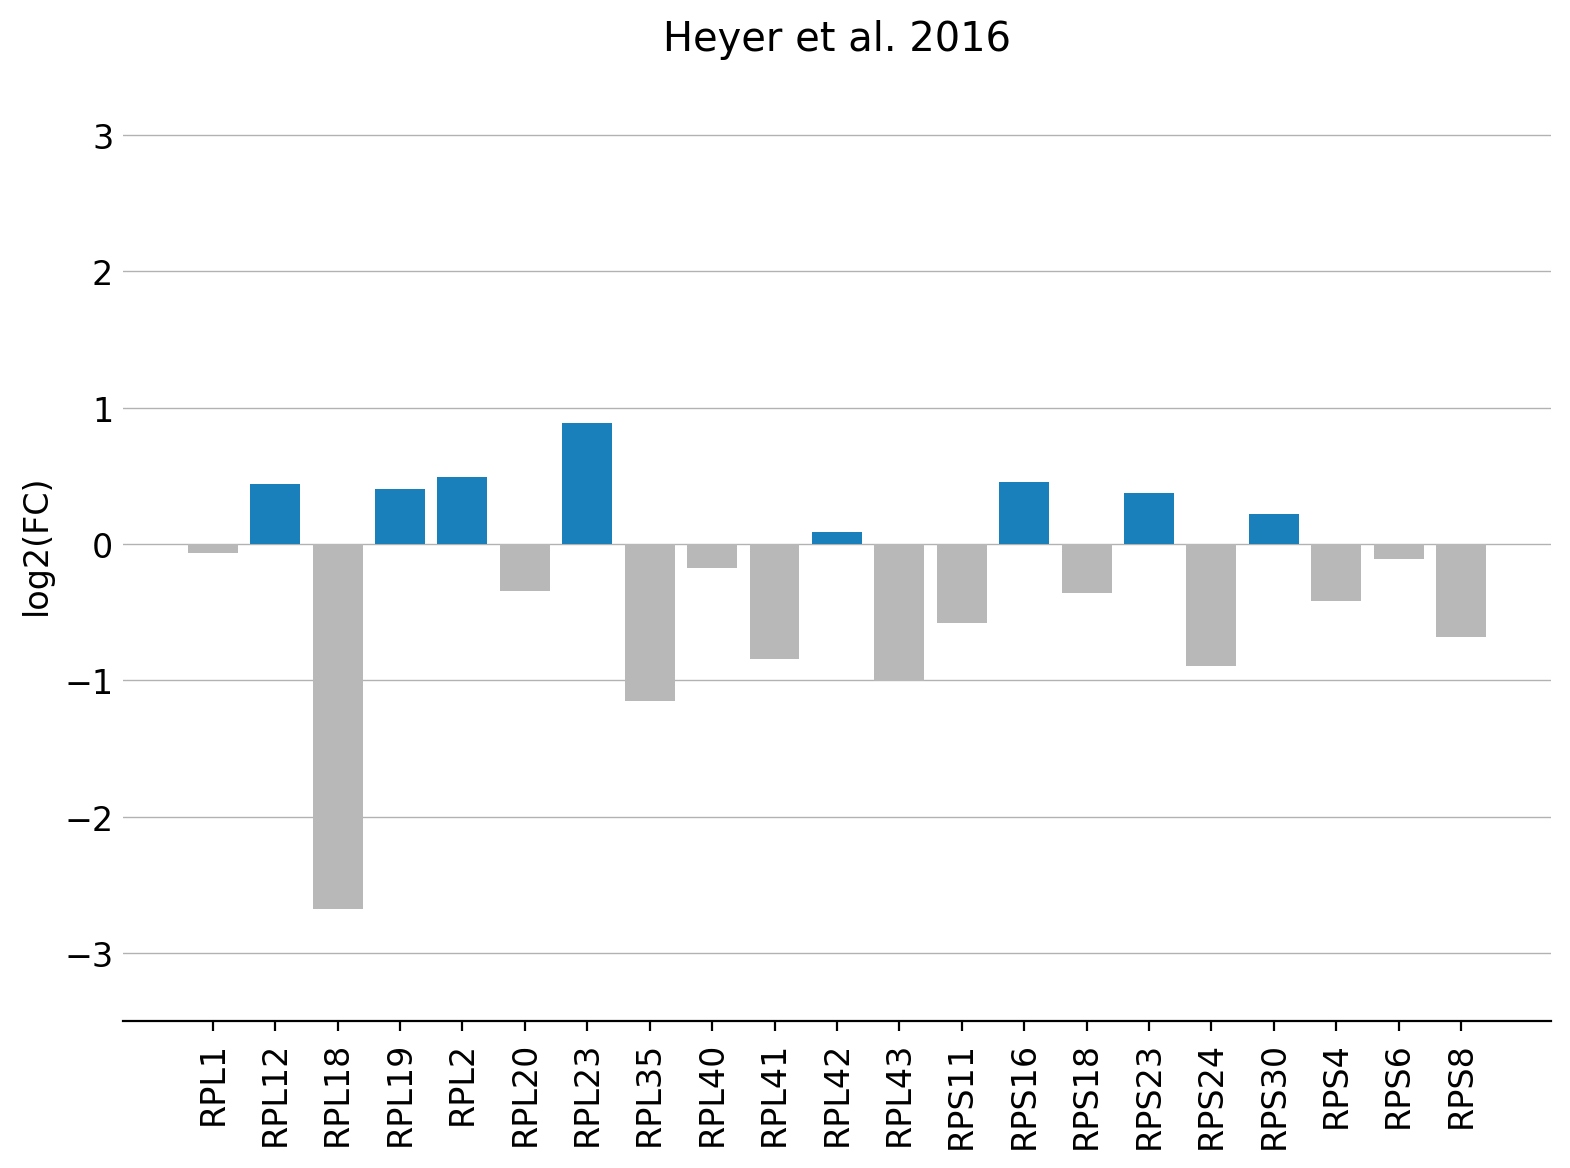

In [60]:
df = pd.read_csv('Heyer_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Heyer et al. 2016')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


In [61]:
fc_rna_heyer = rna_diffs[['Base', 'FC']].reset_index(drop=True)
fc_rna_heyer.columns = ['Base', 'Heyer_FC']
fc_ribo_heyer = ribo_diffs[['Base', 'FC']].reset_index(drop=True)
fc_ribo_heyer.columns = ['Base', 'Heyer_FC']

### Chou et al. 2017 GeTMM

In [51]:
df = pd.read_csv('Chou_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']
df.head()

,gene_id,RNA_normal_mean,Ribo_normal_mean
0,RPL1A,676.819805,768.431670
1,RPL1B,966.931733,919.975829
2,RPL2A,1452.865006,2220.031373
3,RPL2B,2125.248211,2733.677722
4,RPL12A,3730.783480,6598.816423


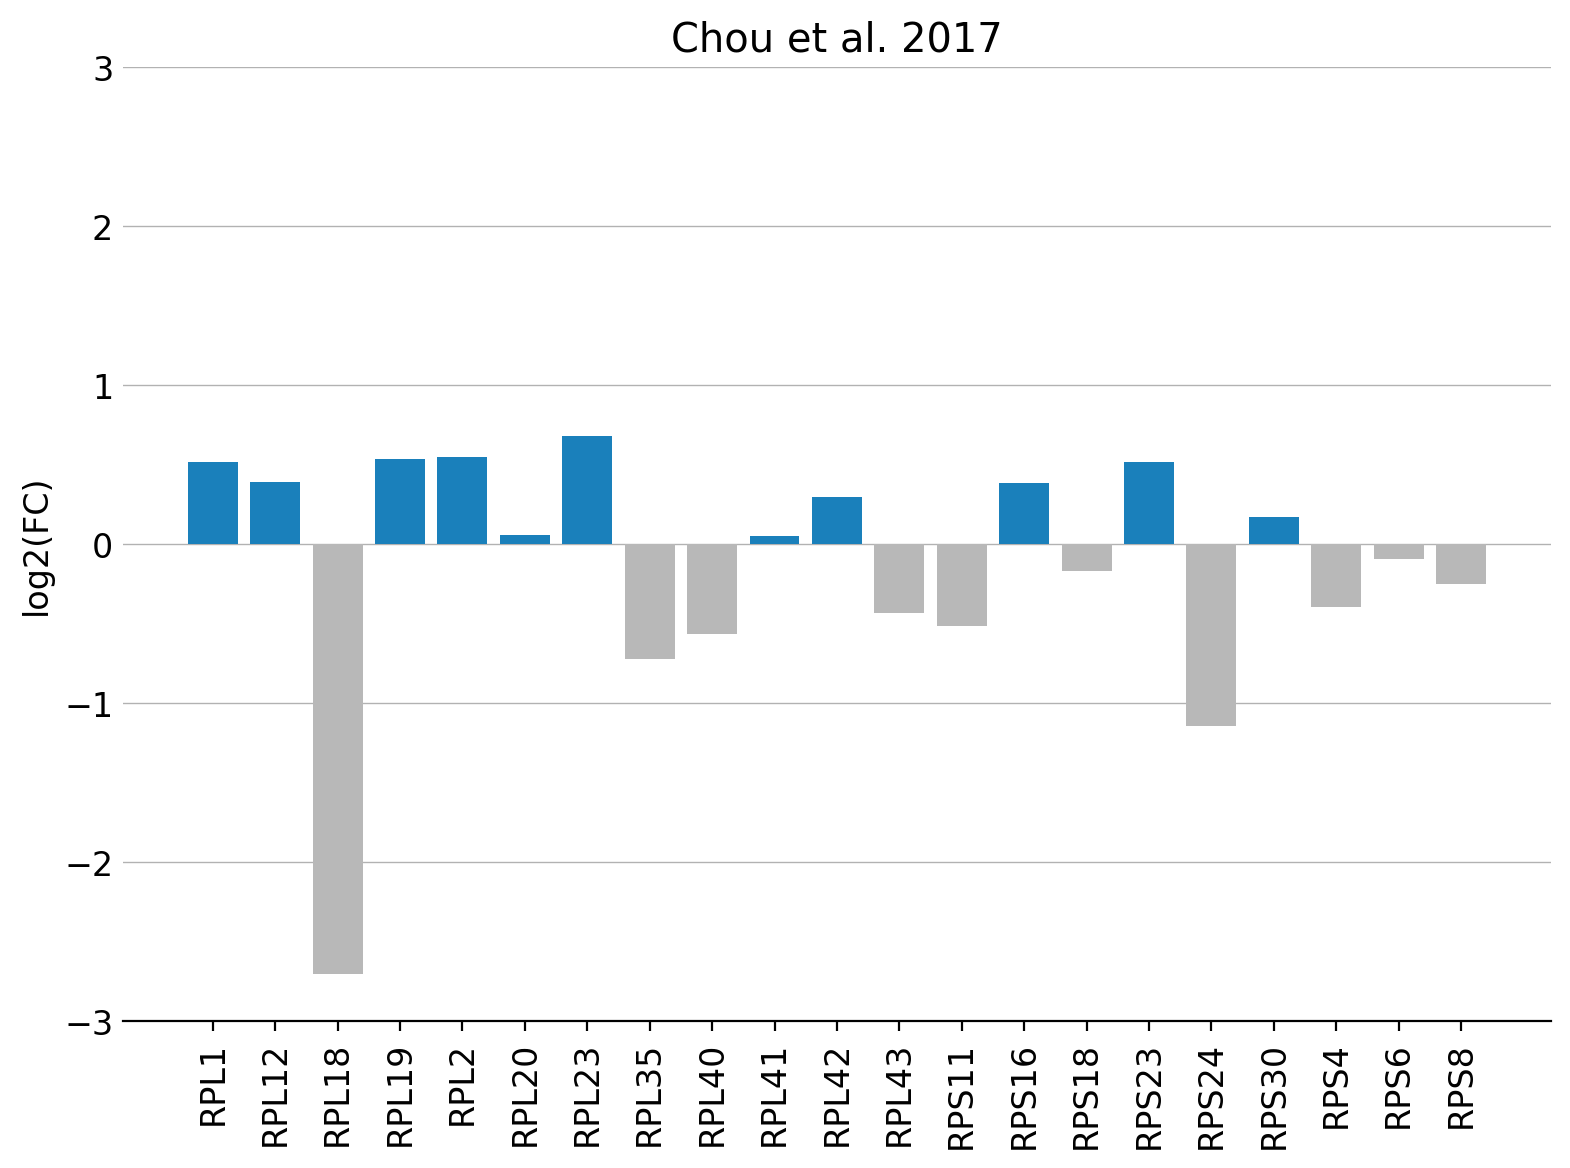

In [52]:
df = pd.read_csv('Chou_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

rna_df = df[['gene_id', 'RNA_normal_mean']]
rna_df.columns = ['gene_id', 'avg']

# Assuming get_paralog_diffs is properly defined and accessible
rna_diffs = get_paralog_diffs(rna_df)
rna_diffs = rna_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in rna_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(rna_diffs['Base'], rna_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3, 3)

plt.title('Chou et al. 2017')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


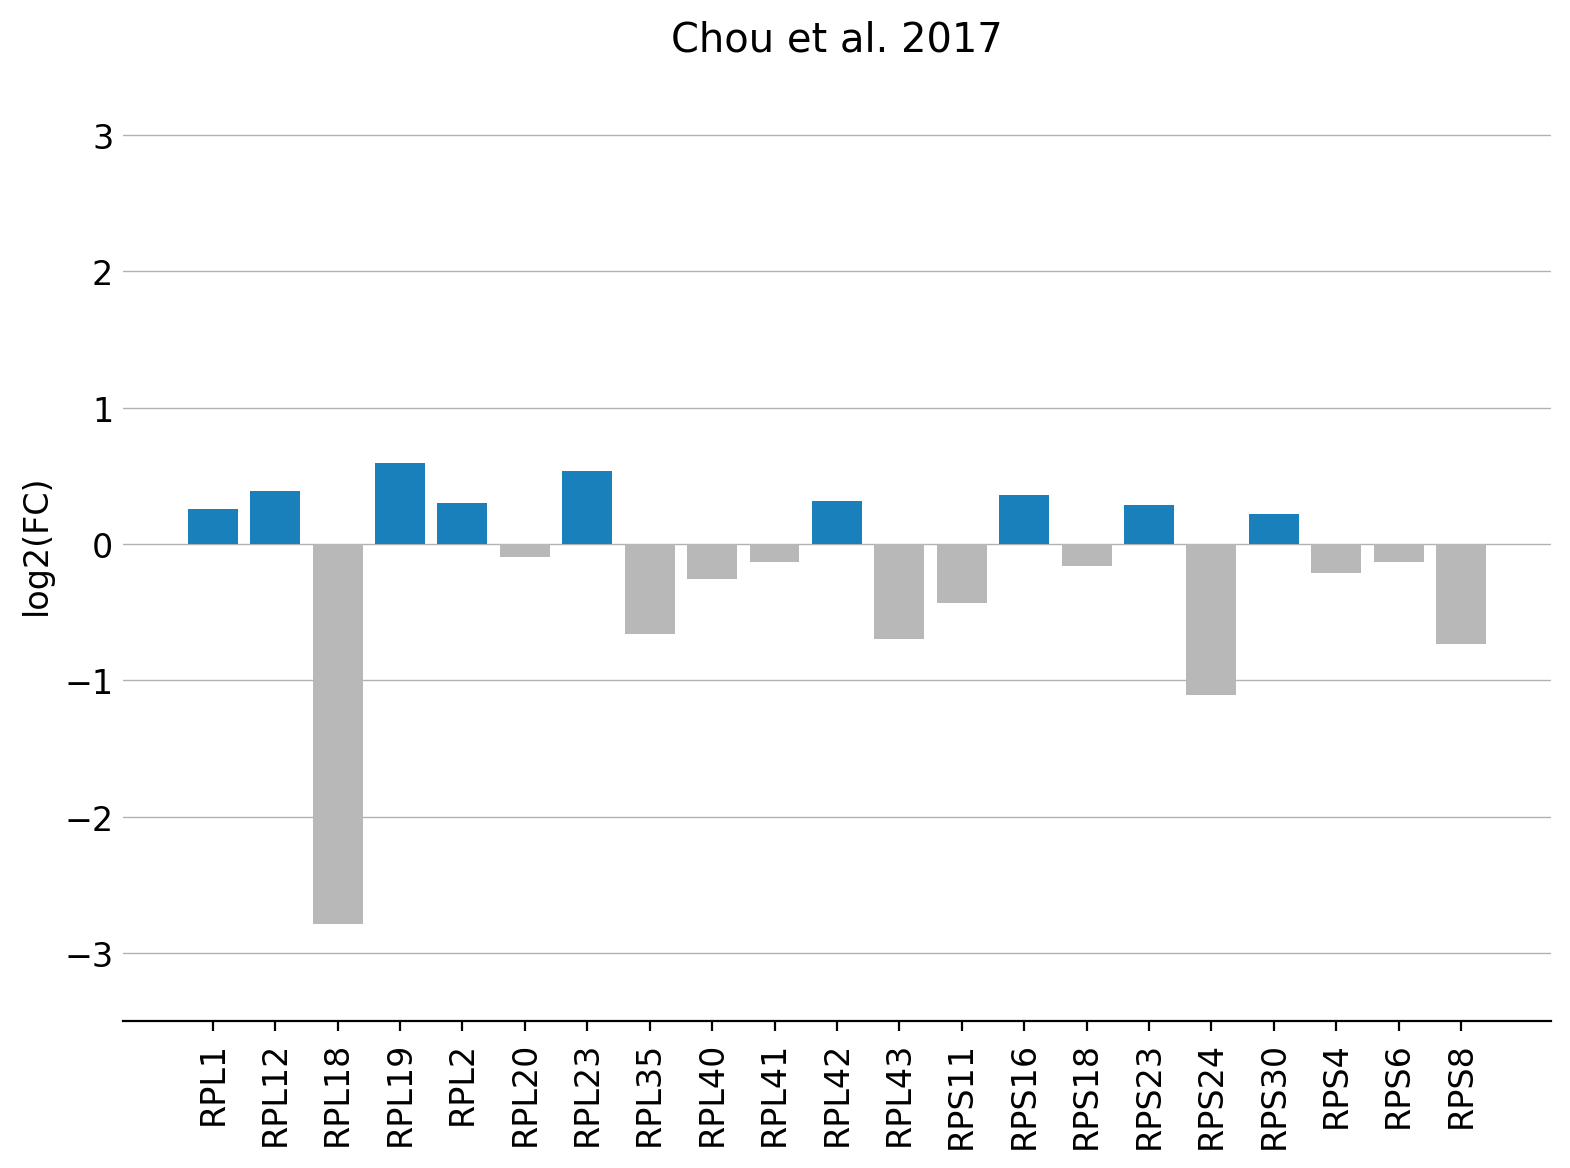

In [53]:
df = pd.read_csv('Chou_avg_paralogs_GeTMM.csv')
df.columns = ['gene_id', 'RNA_normal_mean', 'Ribo_normal_mean']

ribo_df = df[['gene_id', 'Ribo_normal_mean']]
ribo_df.columns = ['gene_id', 'avg']

ribo_diffs = get_paralog_diffs(ribo_df)
ribo_diffs = ribo_diffs.sort_values('Base')

# Determine colors based on the sign of the 'FC' values
colors = ['#1a80bb' if x > 0 else '#b8b8b8' for x in ribo_diffs['FC']]
# colors = ['#97a6c4' if x < 0 else '#384860' for x in rna_diffs['FC']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.bar(ribo_diffs['Base'], ribo_diffs['FC'], color=colors, zorder=3)

plt.xticks(rotation=90)
plt.ylim(-3.5, 3.5)


plt.title('Chou et al. 2017')
plt.ylabel('log2(FC)')

# Customization of the axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='y', which='both', length=0)

# Add horizontal grid lines behind bars
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='black', alpha=0.3, zorder=0)

plt.tight_layout()
plt.show()


In [54]:
fc_rna_chou = rna_diffs[['Base', 'FC']].reset_index(drop=True)
fc_rna_chou.columns = ['Base', 'Chou_FC']
fc_ribo_chou = ribo_diffs[['Base', 'FC']].reset_index(drop=True)
fc_ribo_chou.columns = ['Base', 'Chou_FC']

In [69]:
rna_fc_merged = fc_rna_blevins.merge(fc_rna_nedialkova, on='Base').merge(fc_rna_zinshteyn, on='Base').merge(fc_rna_heyer, on="Base").merge(fc_rna_chou, on="Base").replace(np.NaN, 0)
rna_fc_merged.to_excel("rna_paralogs_tmm_log2_fold_changes_merged.xlsx", index=False)
rna_fc_merged.head()

,Base,Blevins_FC,Nedialkova_FC,Zinshteyn_FC,Heyer_FC,Chou_FC
0,RPL1,-0.367858,0.807458,0.864303,0.029041,0.514642
1,RPL12,0.104546,0.377892,0.772440,1.065108,0.392267
2,RPL18,-2.281089,-2.640042,-2.595939,-3.821089,-2.700851
3,RPL19,0.276189,0.302420,0.580738,0.872776,0.532076
4,RPL2,0.201445,1.095626,0.681172,1.534165,0.548731


In [68]:
ribo_fc_merged = fc_ribo_blevins.merge(fc_ribo_nedialkova, on='Base').merge(fc_ribo_zinshteyn, on='Base').merge(fc_ribo_heyer, on="Base").merge(fc_ribo_chou, on="Base").replace(np.NaN, 0)
ribo_fc_merged.to_excel("ribo_paralogs_tmm_log2_fold_changes_merged.xlsx", index=False)
ribo_fc_merged.head()

,Base,Blevins_FC,Nedialkova_FC,Zinshteyn_FC,Heyer_FC,Chou_FC
0,RPL1,0.121222,0.496020,0.297206,-0.063326,0.259679
1,RPL12,0.597854,0.363558,0.589347,0.437261,0.387275
2,RPL18,-3.282252,-3.093027,-2.900705,-2.675187,-2.788419
3,RPL19,0.356421,0.316540,0.380887,0.403488,0.591206
4,RPL2,0.735820,0.825436,0.731965,0.491663,0.300263


In [85]:
# RPL18 RPS24
rna_fc_merged

,Base,Blevins_FC,Nedialkova_FC,Zinshteyn_FC,Heyer_FC,Chou_FC
0,RPL1,-0.367858,0.807458,0.864303,0.029041,0.514642
1,RPL12,0.104546,0.377892,0.772440,1.065108,0.392267
2,RPL18,-2.281089,-2.640042,-2.595939,-3.821089,-2.700851
3,RPL19,0.276189,0.302420,0.580738,0.872776,0.532076
4,RPL2,0.201445,1.095626,0.681172,1.534165,0.548731
5,RPL20,-0.407385,0.529286,1.232095,-0.363796,0.056720
6,RPL23,0.725808,0.727491,1.095090,-0.474733,0.676820
7,RPL35,-0.426127,-1.235351,-0.610771,-1.247441,-0.722097
8,RPL40,0.115535,-0.618455,-1.007906,-0.393138,-0.563445
9,RPL41,0.120956,0.525319,0.000000,-0.576247,0.052898
